In [27]:
# Add relevant Jupyter notebook extensions
%reload_ext autoreload
%autoreload 2je

from uuv_mission.dynamic import Mission, Submarine, ClosedLoop
import uuv_mission.terrain
from uuv_mission.control import PDController

ValueError: Unrecognized autoreload mode "2je".

In [6]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24', '/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/notebooks', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/myvenv/lib/python3.9/site-packages']


In [7]:
"""
Testing part 3: Mission data extraction using pandas
"""

if __name__ == "__main__":
    # Use the absolute path to the mission.csv file
    mission_file = "/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/data/mission.csv"
    
    # Call the from_csv method to load the mission data
    mission = Mission.from_csv(mission_file)
    
    # Print out the loaded data to verify
    print("Reference Depths:", mission.reference)
    print("Cave Heights:", mission.cave_height)
    print("Cave Depths:", mission.cave_depth)

number of rows  100
Reference Depths: [ 0.          2.9239131   5.51432416  7.48758532  8.65202856  8.9358434
  8.39641558  7.20973438  5.64159015  4.00512537  2.61142659  1.72091746
  1.5031691   2.01140425  3.17564866  4.81554192  6.67072159  8.44392729
  9.84996868 10.66277828 10.75307162 10.11061551  8.84752915  7.18203021
  5.40512093  3.83540296  2.76909013  2.43306084  2.94833378  4.30973288
  6.38498424  8.93345286 11.64165764 14.17007897 16.20400695 17.50054627
 17.92449464 17.46755263 16.24792901 14.49047024 12.49048405 10.56696897
  9.01260615  8.04835863  7.78978173  8.23029238  9.24396757 10.6073632
 12.03684862 13.23550874 13.94215995 13.97469282 13.26084805 11.85151023
  9.91435723  7.70879856  5.54608736  3.74083483  2.56152303  2.1877885
  2.68120511  3.97419381  5.87885843  8.11443358 10.34912038 12.24983594
 13.53216395 14.00276265 13.5876664  12.34212299 10.44049644  8.14787894
  5.7779107   3.64345268  2.00786033  1.04449325  0.81078468  1.24089274
  2.15802395  3.

T is  100


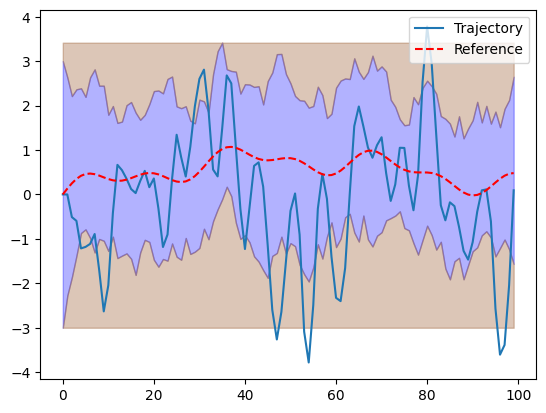

In [45]:
# Step 1: Create a Submarine object
submarine = Submarine()

# Step 2: Create a PDController object with specified gains (you can tune these values)
controller = PDController(kp=0.09, kd=0.7)

# Step 3: Create a Mission object (either from CSV or randomly)
mission = Mission.random_mission(duration=100, scale=1.0)

# Step 4: Create a ClosedLoop object, passing in the submarine and controller
closed_loop = ClosedLoop(plant=submarine, controller=controller)

# Step 5: Simulate the mission with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)

# Step 6: Plot the resulting trajectory
trajectory.plot_completed_mission(mission)

print()

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [42]:
# Import relevant modules

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

NameError: name 'ClosedLoop' is not defined